Image Classificaation using SVM is very efficient way of modelling and very rarely used algorithm for image processing and modelling..!!!!

Tips for using SVM for image classification

* You should have image data in 2D rather than 4D (as SVM training model accepts dim <=2 so we need to convert the image data to 2D which i'll be showing later on in this notebook).

* SVM algorithm is to be used when their is shortage of data in our dataset .

* If we have good amount of image data so, we look further for CNN model.


# INFO OF DATASET...!!

The Dataset is named as 'Color Classification' created by Aydin Ayanzadeh. we are provided with images of different color set with labels of color name such as red,blue,etc link :- https://www.kaggle.com/ayanzadeh93/color-classification

**Importing the dataset**

importing basic Packages..!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

now,we have provided data directory to DATADIR variable and labels of color set to CATEGORIES variable for further use.

In [2]:
import os

DATADIR = r'D:\AI-Practical-Tasks\2023-2024\final\Group D\MangoLeafBD Dataset'

# List directories in DATADIR
CATEGORIES = [d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))]
print(CATEGORIES)
IMG_SIZE=100

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


Ex. of an sample image is shown below


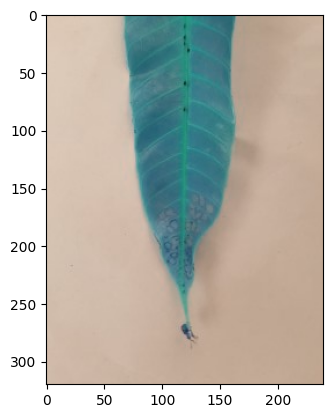

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


performing preprocessing steps...::


In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [5]:
print(len(training_data))

4000


storing trainig length for further use.

In [6]:
lenofimage = len(training_data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [7]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)


In [8]:
X.shape

(4000, 30000)

**flattening the array**

In [9]:
X[1]

array([229, 214, 205, ..., 192, 167, 147], dtype=uint8)

In [10]:
X = X/255.0

Ex. of flattened array...

In [11]:
X[1]

array([0.89803922, 0.83921569, 0.80392157, ..., 0.75294118, 0.65490196,
       0.57647059])

note : y should be in array form compulsory.


In [12]:
y=np.array(y)

In [13]:
y.shape

(4000,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y)



**fitting our data in SVM model**

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

In [ ]:
# from sklearn import svm 
# from sklearn.model_selection import GridSearchCV # Defining the parameters grid for GridSearchCV 
# param_grid={'C':[0.1,1,10,100], 
#             'gamma':[0.0001,0.001,0.1,1], 
#             'kernel':['rbf','poly']} 
  
# # Creating a support vector classifier 
# svc=svm.SVC(probability=True) 
  
# # Creating a model using GridSearchCV with the parameters grid 
# svc=GridSearchCV(svc,param_grid)

In [ ]:
# svc.fit(X_train,y_train)

**predicting the X_test**

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

**Ahhyeah....accuracy of 92.28% which is what we wanted..!!!!**

**fromulating the Classification report**

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
result


we have moslty classified all the images correctly with their labels .doing classification on limited dataset is always a challenging task....but by SVM we have dealed with it succesfully

*IF YOU LIKED MY KERNAL PLEASE UPVOTE IT*

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [ ]:
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools


classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names= classes))

**bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with naive bayes: {0:.2f}%".format(precision))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools


classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names= classes))

**knn + kfold**

In [ ]:
pred_kfold = cross_val_score(knn, X, y, cv=5) 
print("Accuracy with K-NN and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))